<a href="https://colab.research.google.com/github/johyunkang/python_stat/blob/main/chapter06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 06 대표적인 이산형 확률분포

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

%matplotlib inline
%precision 3


'%.3f'

In [2]:
# 아래로 사용할 함수들 미리 정의

# 그래프에서 선의 종류
linestyles = ['-', '--', ':']

# 평균(기댓값)에 대한 함수
def Expect(X, g=lambda x: x) :
    x_set, f = X
    return np.sum([g(x_k) * f(x_k) for x_k in x_set])

# 분산에 대한 함수
def Vari(X, g=lambda x: x) :
    x_set, f = X
    mean = Expect(X, g)
    return np.sum([(g(x_k) - mean)**2 * f(x_k) for x_k in x_set])

In [3]:
# 함수 미리 정의

# 확률변수를 인수로 가지며, 그 확률변수가 확률의 성질을 만족하는지 확인
# 기댓값과 분산을 계산하여 반환
def check_prob(X) :
    print('param X:', X)
    x_set, f = X
    print('x_set:', x_set, ', f:', f)
    prob = np.array([f(x_k) for x_k in x_set])
    assert np.all(prob >= 0), '[ERROR] minus probability'
    prob_sum = np.round(np.sum(prob), 6)
    assert prob_sum == 1, f'[ERROR] sum of probability is {prob_sum}'
    print(f'expected value {Expect(X):.4}')
    print(f'variance {(Vari(X)):.4}')


# 확률변수를 인수로 가지고, 그 확률변수의 확률함수와 기댓값을 그리기 위한 함수   
def plot_prob(X) :
    x_set, f = X
    prob = np.array([f(x_k) for x_k in x_set])

    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)
    ax.bar(x_set, prob, label = 'prob')
    ax.vlines(Expect(X), 0, 1, label='mean')
    ax.set_xticks(np.append(x_set, Expect(X)))
    ax.set_ylim(0, prob.max() * 1.2)
    ax.legend()

    plt.show()
    

### 6.1 베르누이 분포
- 가장 이상적인 이산형 확률분포
- 확률변수가 취할 수 있는 값이 0과 1밖에 없는 분포
- 베르누이 시행을 하여 1이 나오면 성공, 0이 나오면 실패라고 함
- 확률변수가 취할 수 있는 값이 두 가지 밖에 없고, 합이 1이라는 성질
- 어느 한쪽의 확률이 정해지면, 다른 한쪽도 자동적으로 정해짐
- 1이 나오는 확률을 p, 0이 나오는 확률을 1-p 로 함

![bern](https://user-images.githubusercontent.com/291782/198064186-72ba43e1-b92a-462f-9c4d-6c97b39d99c8.png)

- 위 함수가 복잡해 보이지만, 1을 대입하면 p가 반환, 0을 대입하면 1-p가 반환됨

- 동전을 던져 앞면이 나올 확률

앞면이 나오면 1, 뒷면이 나오면 0으로 하는 확률변수 X 는 Bern(1/2)을 따름

$P(X=1) = (\dfrac{1} {2})^1 \times (1 - \dfrac {1} {2})^{(1-1)} = \dfrac {1} {2} $


- 주사위를 한 번 굴려 6이 나오지 않을 확률

6이 나오면 1, 그 외의 숫자가 나오면 0은 Bern(1/6)을 따름

주사위를 굴려 6이 나오지 않을 확률은

$P(X=0) = (\dfrac {1}{6})^0 \times (1 - \dfrac {1} {6})^{(1-0)} = \dfrac {5} {6}$


![bern-expect-var](https://user-images.githubusercontent.com/291782/198065962-fecf7362-2a35-4f87-99c3-6786aef9edfe.png)

In [4]:
# 베르누이 분포
def Bern(p) :
    x_set = np.array([0, 1])
    def f(x) :
        if x in x_set :
            return p ** x * (1 - p) ** (1-x)
        else :
            return 0
    return x_set, f

In [5]:
p = 0.3
X = Bern(p)
x_set, f = Bern(10)
print('x_set:', x_set, ', f:', f)
# 기댓값과 분산 : 기댓값 0.3, 분산은 0.3 * 0.7 = 0.21
check_prob(X)

x_set: [0 1] , f: <function Bern.<locals>.f at 0x7f99b1ecf170>
param X: (array([0, 1]), <function Bern.<locals>.f at 0x7f99b1ecf3b0>)
x_set: [0 1] , f: <function Bern.<locals>.f at 0x7f99b1ecf3b0>
expected value 0.3
variance 0.21


In [6]:
check_prob(X)

param X: (array([0, 1]), <function Bern.<locals>.f at 0x7f99b1ecf3b0>)
x_set: [0 1] , f: <function Bern.<locals>.f at 0x7f99b1ecf3b0>
expected value 0.3
variance 0.21


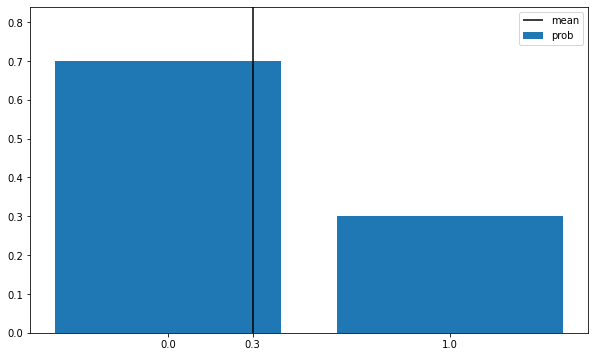

In [7]:
plot_prob(X)
# 중앙의 세로선이 확률변수 X의 기댓값을 나타냄

`scipy.stats`를 사용해 구현

`scipy.stats`에는 베르누이 분포를 따르는 확률변수를 생성할 수 있는 `bernoulli` 함수가 있음

In [8]:
rv = stats.bernoulli(p) # p = 0.3, rv (Random Variable, 확률변수)
print('pmf:', rv.pmf(0), rv.pmf(1))

pmf: 0.7 0.3


- pmf 메서드는 인수로 리스트를 넘길 수 있음
- 리스트의 각 요소에 대한 확률이 저장된 Numpy 의 array 가 반환됨

In [9]:
print('pmf:', rv.pmf([0, 1]))

# cdf 메서드를 사용하면 누적밀도함수를 계산할 수 있음
print('cdf:', rv.cdf([0, 1]))

# mean 을 이용하여 기댓값, var 메서드를 이용하여 분산을 계산 가능
print('mean:', rv.mean(), ', var:', rv.var())

pmf: [0.7 0.3]
cdf: [0.7 1. ]
mean: 0.3 , var: 0.21


#### 베르누이 분포의 정리
- 파라미터 : p
- 취할 수 있는 값 : {0, 1}
- 확률함수 : $p^x(1-p)^{(1-x)}$
- 기댓값 : p
- 분산 : p(1-p)
- scipy.stats : bernoulli(p)

### 6.2 이항분포 (binomial distribution)
성공확률이 p인 베르누이 시행을 n 번 했을 때의 성공 횟수가 따르는 분포

이항분포의 파라미터에는 성공확률인 p와 시행 횟수인 n 

p는 0 &le; p &le; 1, n은 1 이상인 정수

이 책에서는 Bin(n, p)로 표기


![bin](https://user-images.githubusercontent.com/291782/198075433-9f04022b-71f5-44e8-bcbe-4b5514e5f4b3.png)

- 기호 $_nC_x$ 는 **콤비네이션**이라고 부르며, n개라는 서로 다른 것들 중에서 x개를 고를 수 있는 조합의 수를 나타냄

- $_nC_x = \dfrac {n!} {x!(n-x)!}$

- 예) 6명의 학생 중 2명을 고르는 조합은, $_6C_2 = \dfrac {6!} {2! (6-2)! } = 15$ 가 되어 15가지로 계산할 수 있음

*동전을 10번 던져 앞면이 3번 나올 확률*
 - p = $\dfrac {1}{2}$
 - 10번 했을 때의 성공횟수, Bin(10, 1/2)
 - 10번 던져 앞면이 3번 나올 확률은
 - $P(X=3) = _10C_3(\dfrac {1} {2})^3 (1-\dfrac{1}{2})^{(10-3)} = \dfrac {15} {128}$

*주사위를 4번 굴려 6이 나올 확률*

- 이것은 p = 1/6 인 베르누이 시행을 4번 했을 때의 성공 횟수로 볼 수 있기 때문에 $Bin(4, \dfrac {1} {6})$을 따릅니다.
- 그러므로 주사위를 4번 던져 6이 한 번도 나오지 않는 확률은

$P(X=0) = _4C_0(\dfrac{1}{6})^0(1-\dfrac{1}{6})^{(4-0)} = \dfrac {625} {1296}$

로 구할 수 있음

p. 154 (이항분포의 기댓값과 분산) 부터